### 키워드 추출 및 워드클라우드

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import imdb

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# df = pd.read_excel('/content/drive/MyDrive/elice/data/imdb.xlsx', index_col=0)
df = pd.read_excel('./imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
# max_features는 단어를 최대 몇종류를 쓸지
# stop_words는 영어의 관사 같은 것들을 없애줌
cv = CountVectorizer(max_features=500, stop_words='english')
tdm = cv.fit_transform(df['review'])

In [4]:
cv.get_feature_names()[:10]

['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [5]:
tdm[0].A

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
tdm.sum(axis=0)

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [7]:
word_count = pd.DataFrame(
    {'단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat}
)

word_count = word_count.sort_values('빈도', ascending=False)
word_count

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58
...,...,...
375,sense,3
377,seriously,3
378,set,3
173,given,3


In [9]:
#!pip install wordcloud

In [10]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', max_words=100, width=400, height=300)

In [11]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
count_dic

{'movie': 182,
 'film': 163,
 'bad': 71,
 'just': 63,
 'good': 58,
 'like': 48,
 'time': 43,
 'acting': 43,
 'really': 41,
 'great': 41,
 'characters': 35,
 '10': 29,
 'movies': 29,
 'plot': 28,
 'story': 28,
 'don': 26,
 'best': 25,
 'films': 24,
 'script': 24,
 'character': 24,
 'way': 23,
 'seen': 23,
 'watching': 22,
 'make': 22,
 'didn': 22,
 'love': 22,
 'real': 21,
 'think': 21,
 'work': 20,
 'look': 19,
 'actors': 19,
 'scenes': 19,
 'funny': 19,
 'cast': 18,
 'better': 18,
 'wonderful': 18,
 'watch': 17,
 'little': 17,
 'excellent': 16,
 'totally': 15,
 'screen': 14,
 'years': 14,
 'stupid': 14,
 'know': 14,
 'scene': 14,
 'awful': 14,
 'waste': 14,
 'music': 14,
 'people': 14,
 'writing': 13,
 'pretty': 13,
 'art': 13,
 'dialogue': 13,
 'thing': 13,
 'say': 13,
 'man': 13,
 'worth': 13,
 'right': 13,
 've': 13,
 'recommend': 13,
 'things': 12,
 'thought': 12,
 'life': 12,
 'doesn': 12,
 'line': 12,
 'performance': 12,
 'terrible': 12,
 'saw': 12,
 'director': 12,
 'interestin

In [12]:
cloud = wc.fit_words(count_dic)

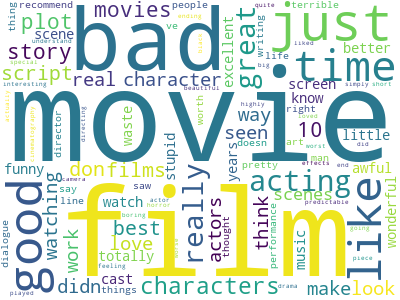

In [13]:
cloud.to_image()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
tdm = tfidf.fit_transform(df['review'])

In [15]:
word_count = pd.DataFrame({
    '단어':tfidf.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
}
)
word_count = word_count.sort_values('빈도', ascending=False)
word_count

,단어,빈도
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656
...,...,...
181,graphics,0.174344
266,massive,0.174344
427,theme,0.138036
162,fx,0.138036


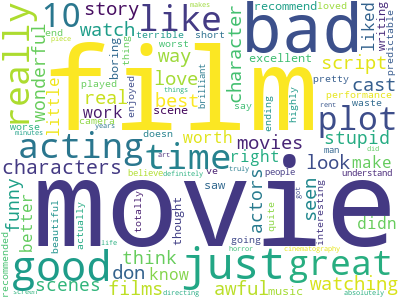

In [22]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)
cloud.to_image()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer(max_features=500, stop_words='english')
tdm2 = cv.fit_transform(df['review'])
trans = TfidfTransformer()
tdm3 = trans.fit_transform(tdm2)

In [25]:
tdm2[0].A

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
tdm3[0].A

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

### 형태소분석기

In [27]:
# !pip install kiwipiepy
# !pip install stanza
# !pip install konlpy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.10.0-py3-none-any.whl size=25882660 sha256=1a187fb675a63a02eaaba3bf36ebec56004e0e8afb6cb63bc1cba6024b50911c
  Stored in directory: c:\users\ljkea\appdata\local\pip\cache\wheels\54\e7\c0\0af933b1dbe407099c75ccbc928df4cacfba4ea68413e12600
Successfully built kiwipiepy-model


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170283 sha256=f2cd443618448bdf53510af2e8399ae85caecb525c51e21686429c533a97890e
  Stored in directory: c:\users\ljkea\appdata\local\pip\cache\wheels\7d\09\45\1ad33b3ac1e05d07355a3c81fe56c89837774fdb6665574765
Successfully built emoji


In [41]:
from konlpy.tag import Komoran
tagger = Komoran()

tagger.pos('개인 투자자들은 모회사 주가가 하락하고 기존 주주의 이익이 훼손된다는 이유에서 기업의 모자회사 쪼개기 상장을 비판해왔다.')

[('개인', 'NNG'),
 ('투자자', 'NNG'),
 ('들', 'XSN'),
 ('은', 'JX'),
 ('모회사', 'NNP'),
 ('주가', 'NNG'),
 ('가', 'JKS'),
 ('하락', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('기존', 'NNG'),
 ('주주', 'NNP'),
 ('의', 'JKG'),
 ('이익', 'NNG'),
 ('이', 'JKS'),
 ('훼손', 'NNG'),
 ('되', 'XSV'),
 ('ㄴ다는', 'ETM'),
 ('이유', 'NNG'),
 ('에서', 'JKB'),
 ('기업', 'NNG'),
 ('의', 'JKG'),
 ('모자', 'NNP'),
 ('회사', 'NNP'),
 ('쪼개', 'VV'),
 ('기', 'ETN'),
 ('상장', 'NNG'),
 ('을', 'JKO'),
 ('비판', 'NNG'),
 ('하', 'XSV'),
 ('아', 'EC'),
 ('오', 'VX'),
 ('았', 'EP'),
 ('다', 'EF'),
 ('.', 'SF')]

In [40]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
kiwi.prepare()

kiwi.analyze('개인 투자자들은 모회사 주가가 하락하고 기존 주주의 이익이 훼손된다는 이유에서 기업의 모자회사 쪼개기 상장을 비판해왔다.')

[([Token(form='개인', tag='NNG', start=0, len=2),
   Token(form='투자자', tag='NNG', start=3, len=3),
   Token(form='들', tag='XSN', start=6, len=1),
   Token(form='은', tag='JX', start=7, len=1),
   Token(form='모', tag='MM', start=9, len=1),
   Token(form='회사', tag='NNG', start=10, len=2),
   Token(form='주가', tag='NNG', start=13, len=2),
   Token(form='가', tag='JKS', start=15, len=1),
   Token(form='하락', tag='NNG', start=17, len=2),
   Token(form='하', tag='XSV', start=19, len=1),
   Token(form='고', tag='EC', start=20, len=1),
   Token(form='기존', tag='NNG', start=22, len=2),
   Token(form='주주', tag='NNG', start=25, len=2),
   Token(form='의', tag='JKG', start=27, len=1),
   Token(form='이익', tag='NNG', start=29, len=2),
   Token(form='이', tag='JKS', start=31, len=1),
   Token(form='훼손', tag='NNG', start=33, len=2),
   Token(form='되', tag='XSV', start=35, len=1),
   Token(form='ᆫ다는', tag='ETM', start=36, len=2),
   Token(form='이유', tag='NNG', start=39, len=2),
   Token(form='에서', tag='JKB', star